# **PCA**

In [153]:
import pandas as pd                  
import numpy as np  
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale

Cargamos dataset y observamos las variables

In [154]:
df = pd.read_csv('/content/performance_clean.csv')

In [155]:
df.head()

,customerid,systemloanid,loannumber,loanamount,termdays,good_bad_flag,interest,loan_interval,interest_interval
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,30,Good,4500.0,10000,mas de 3000
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,30,Good,2250.0,10000,menos de 3000
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,Other,Good,2250.0,10000,menos de 3000
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,Other,Good,1500.0,10000,menos de 3000
4,8a858970548359cc0154883481981866,301962360,9,40000.0,30,Good,4000.0,10000,mas de 3000


In [156]:
df.dtypes

customerid            object
systemloanid           int64
loannumber             int64
loanamount           float64
termdays              object
good_bad_flag         object
interest             float64
loan_interval          int64
interest_interval     object
dtype: object

In [157]:
df = df.drop(columns=['customerid'] + ['systemloanid'])
y = df['good_bad_flag']

Vemos cuales son las variables categóricas

In [158]:
categorical_vars = set(df.columns[df.dtypes == object])
numerical_vars = set(df.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [159]:
print(categorical_vars)
print(numerical_vars)

['termdays', 'good_bad_flag', 'interest_interval']
['loanamount', 'loannumber', 'loan_interval', 'interest']


**Dummies**

In [160]:
#Generamos dummies de las variables categóricas:
dummy_int = pd.get_dummies(df[['interest_interval']], drop_first=True)
dummy_td = pd.get_dummies(df[['termdays']], drop_first=True)
#Añadimos las variables dummies y borramos las categóricas originales:
df = pd.concat([df, dummy_int, dummy_td], axis=1)
df = df.drop(['interest_interval', 'good_bad_flag', 'termdays'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [161]:
df

,loannumber,loanamount,interest,loan_interval,interest_interval_mas de 3000,interest_interval_menos de 3000,termdays_Other
0,12,30000.0,4500.0,10000,1,0,0
1,2,15000.0,2250.0,10000,0,1,0
2,7,20000.0,2250.0,10000,0,1,1
3,3,10000.0,1500.0,10000,0,1,1
4,9,40000.0,4000.0,10000,1,0,0
...,...,...,...,...,...,...,...
4277,2,10000.0,3000.0,10000,0,0,0
4278,2,10000.0,3000.0,10000,0,0,0
4279,3,10000.0,1500.0,10000,0,1,1
4280,2,10000.0,3000.0,10000,0,0,0


Estandarizamos 

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(df)

In [163]:
print(np.mean(X))
print(np.var(X))

-1.6356658693349874e-17
0.8571428571428573


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [165]:
print(np.mean(X_train))
print(np.var(X_train))

-0.000880201007851742
0.8538594737870813


# **PCA**

In [166]:
from sklearn.decomposition import PCA

In [167]:
pca = PCA()
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)


In [168]:
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[5.68594805e-01 2.67756769e-01 9.51176999e-02 4.32144018e-02
 1.73452181e-02 7.97110647e-03 1.68090678e-36]


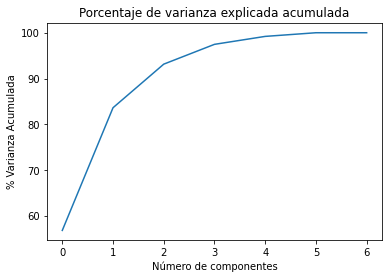

In [169]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componentes")
plt.ylabel("% Varianza Acumulada")
plt.title('Porcentaje de varianza explicada acumulada')
plt.show()

# **Feature importance (Con PCA)**

In [170]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df.columns) + 1)],
    index=df.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
loannumber,0.725067,0.416316,0.453377,2.324101e-01,1.284784e-01,-1.875904e-02,0.000000e+00
loanamount,0.885487,0.363641,0.103029,-3.909977e-02,-2.604267e-01,1.969728e-02,7.681576e-34
interest,0.857822,0.008165,-0.464257,1.654063e-01,6.451892e-02,1.109798e-01,-4.007524e-33
loan_interval,0.000000,-0.000000,-0.000000,2.468900e-17,-1.966364e-16,-5.089673e-16,-3.170099e-18
interest_interval_mas de 3000,0.901944,0.149806,-0.068462,-3.790144e-01,1.169218e-01,-4.910430e-02,9.353914e-34


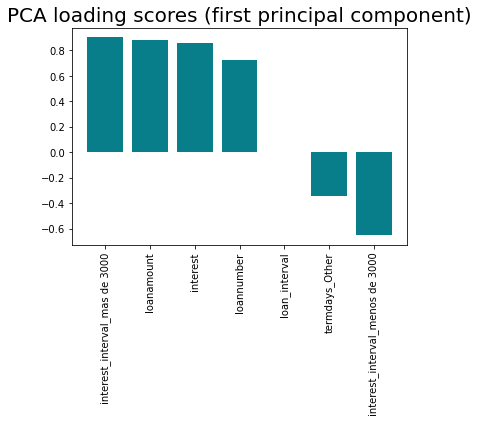

In [171]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()